# Cloning quasars.
Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

Download the SDSS quasar data:
- Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

In [1]:
import numpy as np 
from astroML.datasets import fetch_dr7_quasar
from matplotlib import pyplot as plt

In [2]:
#Function Rejection sampling
def rejection(val, bin, N):
    x=np.random.uniform(min(bin), max(bin), N) 
    y=np.random.uniform(min(val), max(val), N)
    x_accepted = [] 
    y_accepted = []
    for i in range(N):
        bin_index = np.digitize(x[i], bin) - 1  # Find the corresponding bin for x[i]
        if y[i] < val[bin_index]:  # Accept point if y[i] is less than the histogram value
            x_accepted.append(x[i]) 
            y_accepted.append(y[i])

    return x_accepted, y_accepted



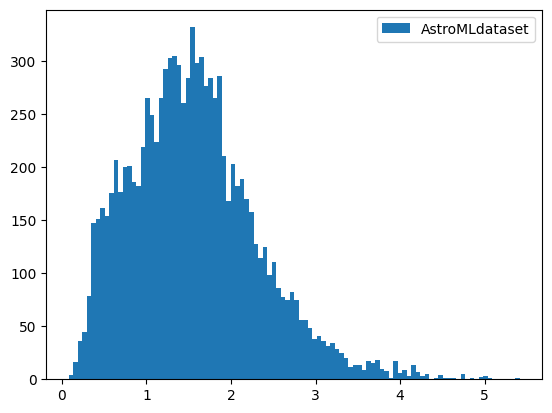

In [3]:
data = fetch_dr7_quasar()
data = data[:10000] #Select the first 10000 points
z = data['redshift']
n_bins=100 #Number of bins

plt.hist(z, n_bins, label="AstroMLdataset")
plt.legend()


## Rejection Sampling

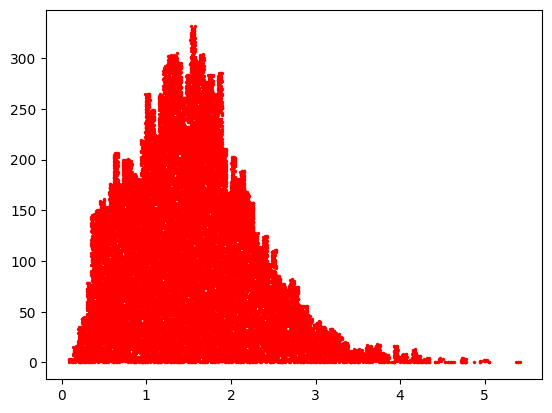

In [4]:

N=100000 #Number of uniformly generated numbers
values, bins =np.histogram(z,n_bins)
x_accepted, y_accepted= rejection(values, bins, N)
plt.scatter(x_accepted,y_accepted, color='red', s=2, marker='o')

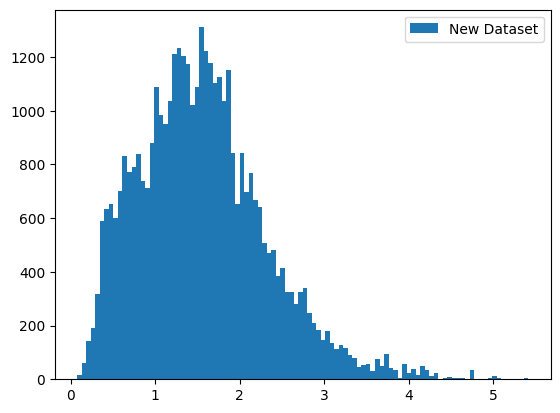

In [5]:
new_data=np.concatenate([z,x_accepted])
plt.hist(new_data, n_bins, label="New Dataset")
plt.legend()

## Inverse transform Sampling

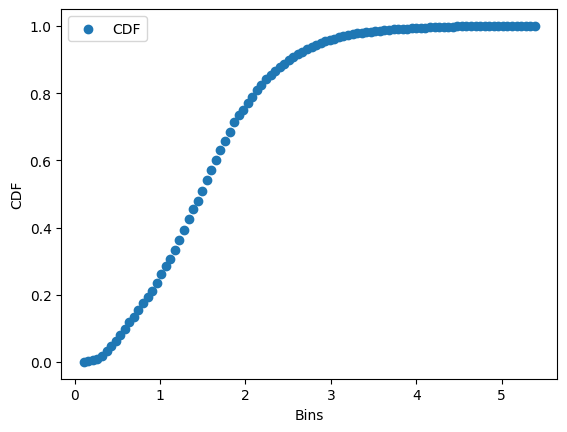

In [6]:
values, bins =np.histogram(z,n_bins)
somma=np.sum(values)
values=values/somma
cdf=np.cumsum(values) #the cdf
bin_center=((bins[:-1]+ bins[1:])/2)
plt.scatter( bin_center, cdf, label="CDF")
plt.xlabel("Bins")
plt.ylabel("CDF")
plt.legend()

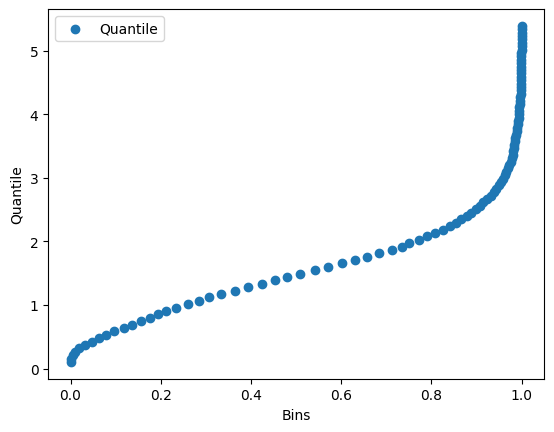

In [7]:
x_quantile=cdf
y_quantile= bin_center
plt.scatter( x_quantile, y_quantile, label="Quantile")
plt.xlabel("Bins")
plt.ylabel("Quantile")
plt.legend()

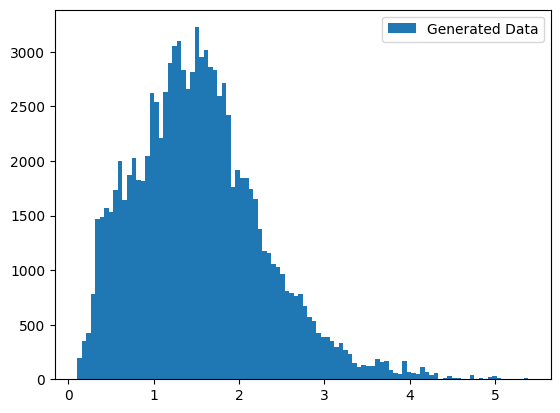

In [8]:
num=np.random.uniform(0,1,N)
y=np.interp(num,x_quantile, y_quantile)
plt.hist(y, n_bins, label="Generated Data")
plt.legend()

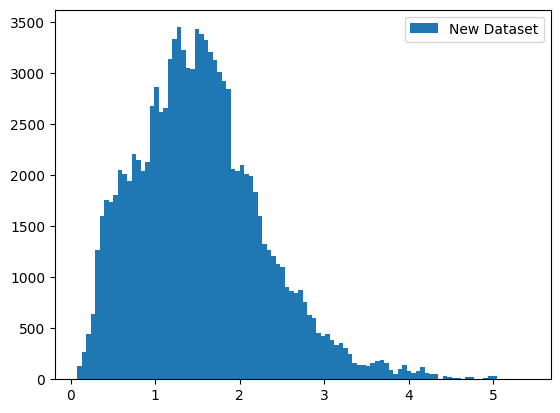

In [9]:
new_data1=np.concatenate([z,y])
plt.hist(new_data1, n_bins, label="New Dataset")
plt.legend()

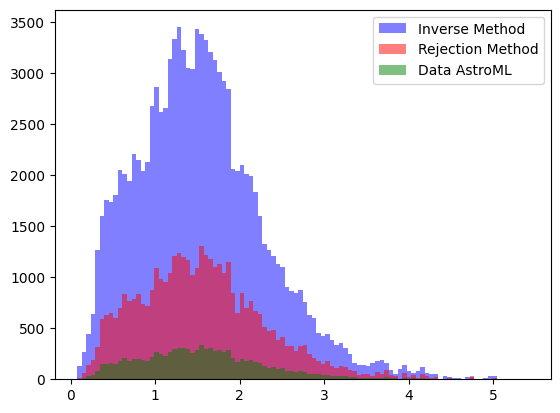

In [10]:
plt.hist(new_data1, n_bins, label="Inverse Method", color="Blue", alpha=0.5)
plt.hist(new_data, n_bins, label="Rejection Method", color="Red", alpha=0.5)
plt.hist(z,n_bins, color="green", label="Data AstroML", alpha=0.5)
plt.legend()